# Day 2 of IAU MESA hackathon: Rotating stars 

Summer 2024

This notebook contains the solutions to the plotting excersizes of day 2 of the MESA hackathon

In [28]:
# Imports
import numpy as np                  # Import numpy for numerical operations
import matplotlib.pyplot as plt     # Import matplotlib for plotting
import mesa_reader as mr            # Import mesa_reader to read in history/profile files

from astropy import constants as const
import astropy.units as u


In [177]:

######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,20,25,26
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=SMALL_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# Turn off natural name warning for panda tables (this is due to '@' and '>' in the COMPAS column names)
import warnings
from tables import NaturalNameWarning
warnings.filterwarnings('ignore', category=NaturalNameWarning)


In [178]:
# Make a MesaData object for the history file
histdata = mr.MesaData('./rotating_star_proj/LOGS/history.data')

# print what information is available in the history file
print(histdata.bulk_names)

('model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp', 'cno', 'tri_alpha', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3', 'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8', 'he_core_mass', 'co_core_mass', 'one_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'log_Teff', 'log_L', 'log_R', 'log_g', 'v_div_csound_surf', 'surf_avg_j_rot', 'surf_avg_omega', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_rot', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'log_rotational_mdot_boost', 'log_center_T', 'log_center_Rho', 'log_center_P', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'center_mu', 'center_ye', 'center_abar', 'center_entropy', 'center_omega', 'center_omega_div_omega_crit', 'center_h1', 'center_he4', 'center_c12

# Making a pretty HR diagram for information purposes

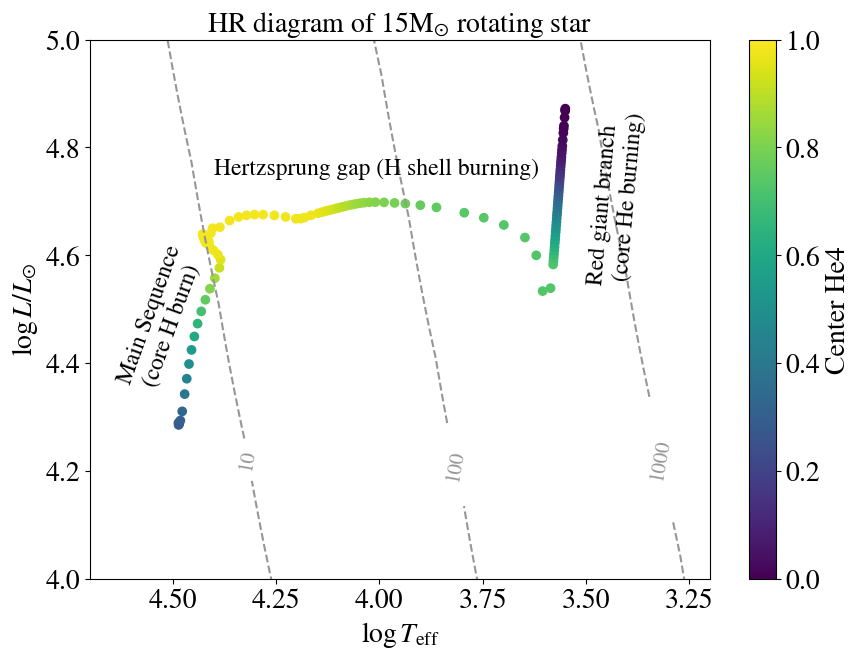

In [179]:
# Relation between L, Teff and R (Stefan-Boltzmann law)
def Radius(Teff, L):
    Teff = Teff*u.K
    L = (L*u.Lsun).to(u.W) #change from Lsun to W
    R = (L/(4*np.pi * const.sigma_sb*Teff**4))**0.5
    return R.to(u.Rsun).value

# Start plotting
fig, ax = plt.subplots(figsize = (10,7))

plt.title('HR diagram of $15 \mathrm{M_{\odot}} $ rotating star', size = 20) 
plt.scatter(histdata.log_Teff, histdata.log_L, 
            c = histdata.center_he4, cmap = 'viridis', vmin = 0, vmax =1)
plt.colorbar(label = 'Center He4')

# # plot contour lines of constant radius using SB law 
Teffs = np.linspace(1.5, 8, 100)
Ls = np.linspace(2.0, 6.0, 100)
Teffs_grid, Ls_grid = np.meshgrid(Teffs, Ls)# Create a grid 
Radius_grid = Radius(10**Teffs_grid, 10**Ls_grid) # Apply Radius to each pair of Teffs and Ls values
CS = plt.contour(Teffs_grid, Ls_grid, Radius_grid, levels = [1, 10, 100, 1e3, 1e4],
            colors='#969696', linestyles='dashed')
plt.clabel(CS, inline=1, inline_spacing = -5, fontsize=15,
           manual = [(4.5, 4.2), (3.9, 4.2), (3.5, 4.2), (2.5, 4.2), (1.5, 4.1)] )

# Annotate some evolutionary phases
plt.text(4.64, 4.35, 'Main Sequence \n (core H burn)', rotation = 70, fontsize = 17)
plt.text(4.4, 4.75, 'Hertzsprung gap (H shell burning)', fontsize = 17)
plt.text(3.5, 4.55, 'Red giant branch \n (core He burning)', rotation = 85, fontsize = 17)

# Flip the x-axis
plt.xlim(3.2,4.7)
plt.ylim(4,5)
plt.gca().invert_xaxis()
plt.xlabel('$\log T_{\mathrm{eff}}$')
plt.ylabel('$\log L/L_{\odot}$')
plt.savefig('HR_diagram.png', bbox_inches = 'tight')
plt.show()

# Task R.3 
## Surface rotation

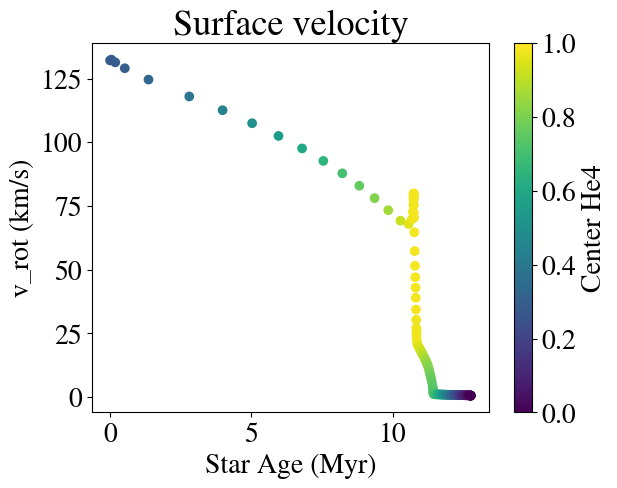

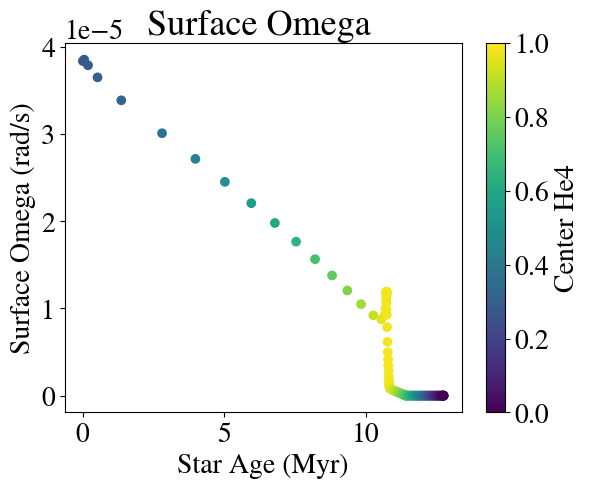

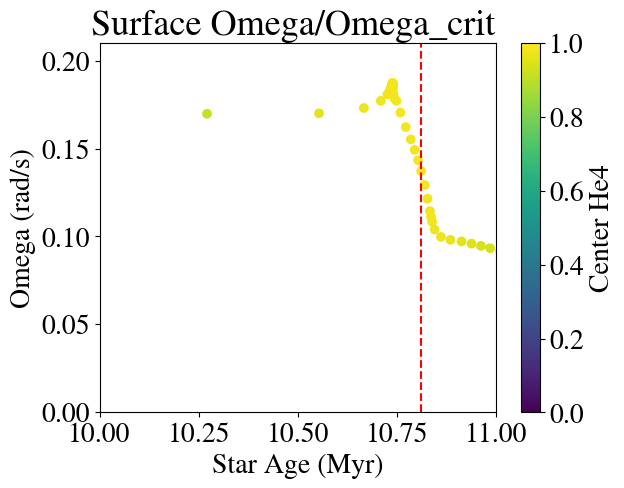

In [225]:
# # # # # # # # # # # # # # # 
plt.title('Surface velocity') 
plt.scatter(histdata.star_age/1e6, histdata.surf_avg_v_rot, 
            c = histdata.center_he4, cmap = 'viridis', vmin = 0, vmax =1)

plt.colorbar(label = 'Center He4')
plt.xlabel('Star Age (Myr)')
plt.ylabel('v_rot (km/s)')
plt.show()

# # # # # # # # # # # # # # # 
plt.title('Surface Omega ')
plt.scatter(histdata.star_age/1e6, histdata.surf_avg_omega, 
            c = histdata.center_he4, cmap = 'viridis', vmin = 0, vmax =1)

plt.colorbar(label = 'Center He4')
plt.xlabel('Star Age (Myr)')
plt.ylabel('Surface Omega (rad/s)')
plt.show()


# # # # # # # # # # # # # # # 
plt.title('Surface Omega/Omega_crit ')
plt.scatter(histdata.star_age/1e6, histdata.surf_avg_omega/histdata.surf_avg_omega_crit, 
            c = histdata.center_he4, cmap = 'viridis', vmin = 0, vmax =1)

plt.axvline(x =histdata.star_age[histdata.model_number ==200]/1e6, color = 'red', linestyle = 'dashed')
plt.xlim(10,11)
plt.colorbar(label = 'Center He4')
plt.xlabel('Star Age (Myr)')
plt.ylabel('Omega (rad/s)')
plt.show()



# Loading in the profiles

We first print out the central He fraction related to each of the model numbers

In [193]:
# Collect the profile numbers that you have available
model_nums_in_profiles = np.loadtxt('rotating_star_proj/LOGS/profiles.index',
                                    skiprows=1, usecols=0) # first row is header, & we only want the model numbers

# printing out the Center He fraction associated with these model numbers
for mod_num in model_nums_in_profiles:
    print(f'model_number {mod_num}, center_He = {histdata.center_he4[histdata.model_number == mod_num]}, \
        log_LH = {histdata.log_LH[histdata.model_number == mod_num]}')


model_number 1.0, center_He = [0.28086008],         log_LH = [4.28415978]
model_number 50.0, center_He = [0.65193281],         log_LH = [4.47355568]
model_number 100.0, center_He = [0.97992411],         log_LH = [4.57111219]
model_number 150.0, center_He = [0.98061964],         log_LH = [4.95834054]
model_number 200.0, center_He = [0.98062024],         log_LH = [4.68449932]
model_number 250.0, center_He = [0.94715271],         log_LH = [4.65448379]
model_number 300.0, center_He = [0.84606771],         log_LH = [4.65181866]
model_number 350.0, center_He = [0.73602666],         log_LH = [4.60435451]
model_number 400.0, center_He = [0.65580795],         log_LH = [4.49745522]
model_number 450.0, center_He = [0.4432748],         log_LH = [4.52248538]
model_number 500.0, center_He = [0.22798564],         log_LH = [4.52133163]
model_number 550.0, center_He = [0.05810737],         log_LH = [4.51050381]
model_number 598.0, center_He = [4.59577528e-07],         log_LH = [4.57570775]


We are interested in:
- Zero Age Main Sequence (ZAMS)
- the end of core H burning, or Terminal Age Main Sequence (TAMS)
- core He-exhaustion.

The first model corresponds to ZAMS, the center_he fraction stagnates at model ~100 or 150, these are a reasonable proxy for the TAMS, the last model (598) corresponds to the end of core He burining

In [226]:
# Load the log directory
logs = mr.MesaLogDir('rotating_star_proj/LOGS')

# and the relevant profiles
profile_ZAMS        = logs.profile_data(model_number=1)
profile_TAMS        = logs.profile_data(model_number=150)
profile_He_exhaust   = logs.profile_data()# Loads last profile


# Internal rotation profiles

## Omega as a function of the mass coordinate

('zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'dq_ratio', 'q', 'radius', 'velocity', 'v_div_r', 'pressure_scale_height', 'mmid', 'logxq', 'temperature', 'entropy', 'pressure', 'logPgas', 'pgas_div_ptotal', 'eta', 'mu', 'grada', 'free_e', 'csound', 'v_div_csound', 'eps_grav', 'eps_nuc', 'non_nuc_neu', 'pp', 'cno', 'tri_alpha', 'c_alpha', 'n_alpha', 'o_alpha', 'ne_alpha', 'na_alpha', 'mg_alpha', 'si_alpha', 's_alpha', 'ar_alpha', 'ca_alpha', 'ti_alpha', 'cr_alpha', 'fe_co_ni', 'c12_c12', 'c12_o16', 'o16_o16', 'pnhe4', 'photo', 'ni56_co56', 'co56_fe56', 'other', 'abar', 'ye', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'log_opacity', 'luminosity', 'logL', 'total_energy', 'mlt_mixing_length', 'mlt_mixing_type', 'log_conv_vel', 'gradT', 'gradr', 'grad_temperature', 'grad_density', 'gradL', 'sch_stable', 'ledoux_stable', 'gradT_sub_grada', 'conv_vel_div_csound', 'log_mlt_D_mix', 'gradr_sub_grada',

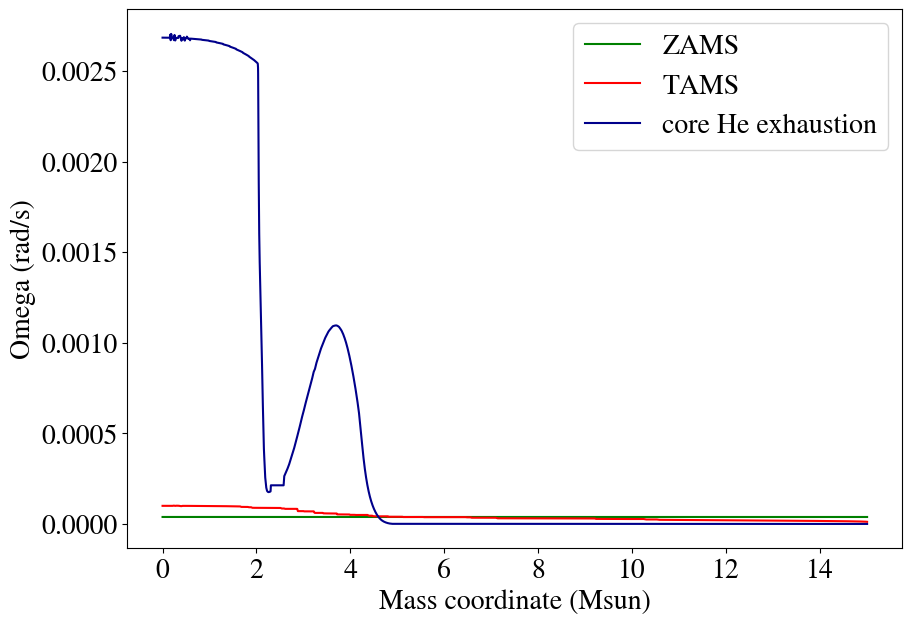

In [231]:
print(profile_ZAMS.bulk_names)
# print(profile_ZAMS.header_names)

fig, ax = plt.subplots(figsize = (10,7))

plt.plot(profile_ZAMS.mass, profile_ZAMS.omega, label = 'ZAMS', color = 'green')
plt.plot(profile_TAMS.mass, profile_TAMS.omega, label = 'TAMS', color = 'red')
plt.plot(profile_He_exhaust.mass, profile_He_exhaust.omega, label = 'core He exhaustion', color = 'darkblue')

# Plot values
plt.xlabel('Mass coordinate (Msun)')
plt.ylabel('Omega (rad/s)')
plt.legend()
plt.savefig('j_rot.png', bbox_inches = 'tight')
plt.show()



## Specific angular momentum as a function of the mass coordinate

('zone', 'mass', 'logR', 'logT', 'logRho', 'logP', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'logdq', 'dq_ratio', 'q', 'radius', 'velocity', 'v_div_r', 'pressure_scale_height', 'mmid', 'logxq', 'temperature', 'entropy', 'pressure', 'logPgas', 'pgas_div_ptotal', 'eta', 'mu', 'grada', 'free_e', 'csound', 'v_div_csound', 'eps_grav', 'eps_nuc', 'non_nuc_neu', 'pp', 'cno', 'tri_alpha', 'c_alpha', 'n_alpha', 'o_alpha', 'ne_alpha', 'na_alpha', 'mg_alpha', 'si_alpha', 's_alpha', 'ar_alpha', 'ca_alpha', 'ti_alpha', 'cr_alpha', 'fe_co_ni', 'c12_c12', 'c12_o16', 'o16_o16', 'pnhe4', 'photo', 'ni56_co56', 'co56_fe56', 'other', 'abar', 'ye', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'log_opacity', 'luminosity', 'logL', 'total_energy', 'mlt_mixing_length', 'mlt_mixing_type', 'log_conv_vel', 'gradT', 'gradr', 'grad_temperature', 'grad_density', 'gradL', 'sch_stable', 'ledoux_stable', 'gradT_sub_grada', 'conv_vel_div_csound', 'log_mlt_D_mix', 'gradr_sub_grada',

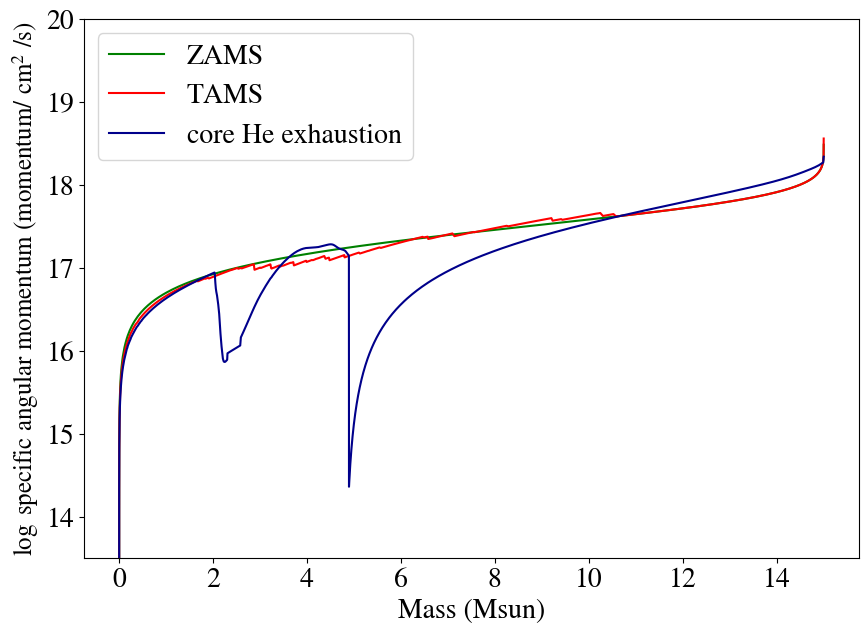

In [227]:
fig, ax = plt.subplots(figsize = (10,7))

plt.plot(profile_ZAMS.mass, profile_ZAMS.log_j_rot, label = 'ZAMS', color = 'green')
plt.plot(profile_TAMS.mass, profile_TAMS.log_j_rot, label = 'TAMS', color = 'red')
plt.plot(profile_He_exhaust.mass, profile_He_exhaust.log_j_rot, label = 'core He exhaustion', color = 'darkblue')

# Plot values
plt.xlabel('Mass (Msun)')
plt.ylabel('$\log$ specific angular momentum (momentum/ cm$^2$ /s)', fontsize = 18)
plt.ylim(13.5, 20)
plt.legend()
plt.savefig('j_rot.png', bbox_inches = 'tight')
plt.show()



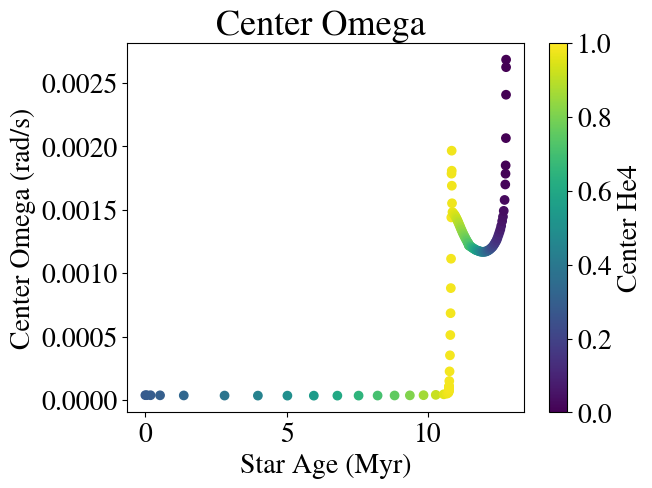

In [195]:

# # # # # # # # # # # # # # # 
plt.title('Center Omega ')
plt.scatter(histdata.star_age/1e6, histdata.center_omega, 
            c = histdata.center_he4, cmap = 'viridis', vmin = 0, vmax =1)

plt.colorbar(label = 'Center He4')
plt.xlabel('Star Age (Myr)')
plt.ylabel('Center Omega (rad/s)')
plt.show()